1. Adam算法：
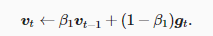
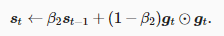
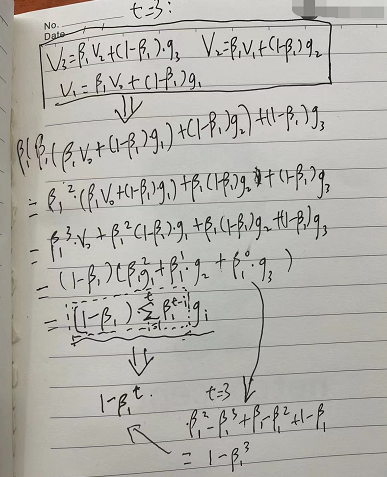
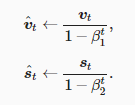
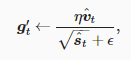
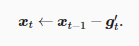
2. Adam算法补充，Yogi
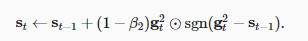

In [1]:
# Adam具体实现
import torch
import dltools


def init_adam_states(feature_dim):
    v_w, v_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    s_w, s_b = torch.zeros((feature_dim, 1)), torch.zeros(1)
    return ((v_w, s_w), (v_b, s_b))

def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = beta2 * s + (1 - beta2) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)+ eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

loss: 0.244, 0.034 sec/epoch


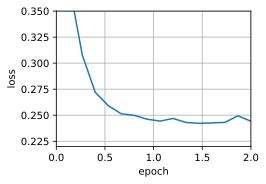

In [2]:
data_iter, feature_dim = dltools.get_data_ch11(batch_size=10)
dltools.train_ch11(adam, init_adam_states(feature_dim),{'lr': 0.01, 't': 1}, data_iter, feature_dim);

loss: 0.243, 0.060 sec/epoch


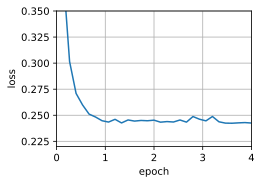

In [5]:
trainer = torch.optim.Adam
dltools.train_concise_ch11(trainer, {'lr': 0.01}, data_iter)

loss: 0.244, 0.071 sec/epoch


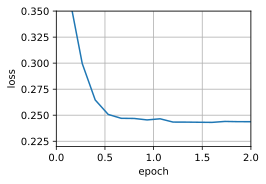

In [6]:
# Yogi
def yogi(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-3
    for p, (v, s) in zip(params, states):
        with torch.no_grad():
            v[:] = beta1 * v + (1 - beta1) * p.grad
            s[:] = s + (1 - beta2) * torch.sign(torch.square(p.grad) - s) * torch.square(p.grad)
            v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
            s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
            p[:] -= hyperparams['lr'] * v_bias_corr / (torch.sqrt(s_bias_corr)+ eps)
        p.grad.data.zero_()
    hyperparams['t'] += 1

data_iter, feature_dim = dltools.get_data_ch11(batch_size=10)
dltools.train_ch11(yogi, init_adam_states(feature_dim),{'lr': 0.01, 't': 1}, data_iter, feature_dim);